<a href="https://colab.research.google.com/github/emkalan/comp215/blob/main/labs/lab04-more_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 4
----------------
#### Name(s):
#### Date:

By the end of this lab you should be able to:
  * use composition and inheritance in a `class` to categorize related information


During this lab, you will be introduced to the following:
  * something, something



## Near Earth Objects (with more classes)

We'll continue working with Near Earth Object data using NASA's API: https://api.nasa.gov/.  In Lab 3 we defined an Asteroid class that contained a simple data structure.  In this lab, we will be Here's a brief review from Lab 2 on how to use the API.  

In [1]:
# import necessary modules
import datetime, json, requests
from pprint import pprint

### Review: make an API query

Here's a query that gets the record for a single NEO that recently passed by.

In [5]:
from google.colab import userdata #
API_KEY = userdata.get('API_KEY')

def get_neos(start_date):
    """ Return a list of NEO for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records ]

def get_neo(id):
    """ Return a NEO record for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    return json.loads(response.text)

from datetime import datetime, timedelta
today = datetime.now()
week_start = today - timedelta(weeks=1)
start = week_start.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

neos = get_neos(start)
assert len(neos) > 0, f'Oh oh!  No NEOs found for {start}'
neo = get_neo(neos[-1]['id'])
pprint(neo)

92 Near Earth Objects found for week of 2025-01-23
{'absolute_magnitude_h': 28.131,
 'close_approach_data': [{'close_approach_date': '1942-11-29',
                          'close_approach_date_full': '1942-Nov-29 13:20',
                          'epoch_date_close_approach': -854880000000,
                          'miss_distance': {'astronomical': '0.1214411562',
                                            'kilometers': '18167338.297857294',
                                            'lunar': '47.2406097618',
                                            'miles': '11288660.5561428972'},
                          'orbiting_body': 'Venus',
                          'relative_velocity': {'kilometers_per_hour': '3974.7516619823',
                                                'kilometers_per_second': '1.1040976839',
                                                'miles_per_hour': '2469.7561090801'}},
                         {'close_approach_date': '1968-07-28',
                        

## Exercise 1: Define a CloseApproach class

Each NEO record comes with a list of `close_approach_data`, where each record in this list represents a single “close approach” to another orbiting body.
1. Develop a class named `CloseApproach` to represent a single close approach record.  State variables are

        neo (refrence to related NEO object)
        orbiting body (str)
        approach date (datetime object!)
        miss distance (float - choose units, document it, and be consistent!)
        relative velocity (ditto)
  
2. Define a "Factory" class method to construct a `CloseApproach` object from one close approach data record (a dictionary object). This method takes a `neo` object as input for the NEO to which the close approach data belongs. Remember to parse the date/time string into a datetime object.

In [ ]:
# Ex. 1
from dataclasses import dataclass

@dataclass
class CloseApproach:
  """Class to represent a near-Earth object's close approach to Earth."""
  neo_id: str
  orbiting_body: str
  approach_date: datetime
  miss_distance: float  # Use km
  relative_velocity: float  # Use km/s

  @classmethod
  def from_NEO(cls, neo_id, approach_data):
    """Factory method to create a CloseApproach from an NEO object and a single close approach record.

    - 'miss_distance' is stored in 'kilometers'.
    - 'relative_velocity' is stored in 'kilometers_per_second'.
    """
    return cls(
      neo_id=neo_id,
      orbiting_body=approach_data['orbiting_body'],
      approach_date=datetime.strptime(approach_data['close_approach_date'], '%Y-%m-%d'),
      miss_distance=float(approach_data['miss_distance']['kilometers']),
      relative_velocity=float(approach_data['relative_velocity']['kilometers_per_second'])
    )


AttributeError: module 'datetime' has no attribute 'strptime'

## Exercise 2: Add list of CloseApproach objects to the Asteroid

Define an `Asteroid` class, like you did in Lab 3, but give the `Asteroid` list of “close approaches”.  This is called *composition* because each Asteroid object will be *composed* of CloseApproach objects (plus some other things).  There is bit of a catch-22 here because we need the `Asteroid` to construct the `CloseApproach` objects. The first two steps deal with that:

1. Add an instance variable to your Asteroid class with a default value of an empty list:

    ```
    close_approaches:list = []
    ```
      
2. In the Asteroid `from_NEO` factory, use a list comprehension to build the list of `CloseApproach` objects for the Asteroid instance, and then set the instance's `close_approaches` variable before returning it. Setting the value of an object's instance variables from outside the class is generally frowned upon - this is why we make the factory a method of the class itself.

3. Add a method to `Asteroid` to return the `CloseApproach` object for the nearest miss (ie. smallest `missed_distance`):
    ```
    def nearest_miss(self):
        ...
    ```

4. Add a method to the Asteroid class, `closest_earth_approach`, that returns the CloseApproach object that represents the closest approach the Asteroid makes to Earth.
    ```
    def closest_earth_approach(self):
        ...
    ```

Write some test code to demonstrate these new features.

In [ ]:
# Ex. 2 your code here

## Exercise 3: Plot the Closest Approaches

Write a function that takes an Asteroid object as a parameter and makes a timeline plot of close approaches.  You may wish to use the `matplotlib.pyplot` `plot` object.  Here is an example of a timeline plot for the asteroid with neo id '54339874'

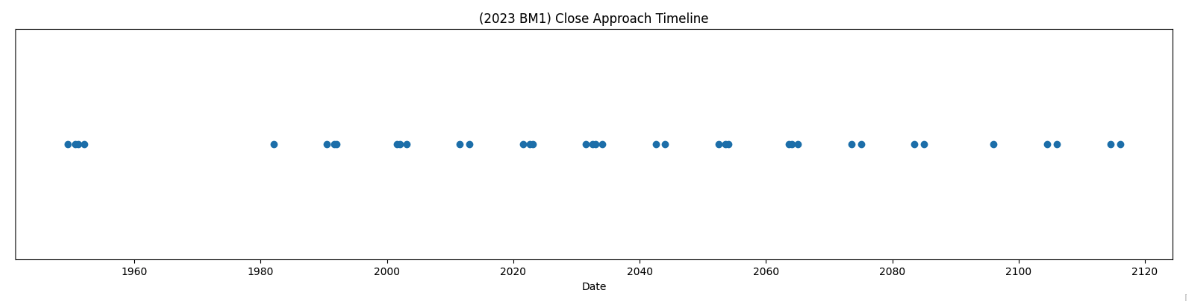

In [ ]:
import matplotlib.pyplot as plt


# Ex. 3 your code here
def timeline_plot(Asteroid):
  """Takes an Asteroid object as a parameter and makes a timeline plot of close approaches"""


## Challenge - Take your skills to the next level...

 With these data structures in place, we can now start answering all kinds of interesting questions about a single Asteroid or a set of Asteroids.  
Here’s a couple ideas to try:



* write a **function** named `most_dangerous_approach`, that takes a date range and returns a single “potentially hazardous” Asteroid object that makes the closest approach to Earth in within that range.  Your algorithm will ultimately need to:
    * grab the list of NEO’s for the given date range;
    * use a list comprehension to build the list of Asteroid objects for the NEO’s returned
    * use a list comprehension to filter  potentially hazardous Asteroids only;
    * use a list comprehension to map each Asteroid to its  closest_earth_approach
    * apply Python’s min function to identify the Asteroid with the closest_earth_approach

You may want to decompose some of these steps into smaller functions.
* add a method to the Asteroid class, estimated_mass, that computes an estimate of the Asteroid’s mass based on its diameter.  This is a model – state your assumptions.
* add a method to the CloseApproach class, impact_force,  that estimates the force of impact if the Asteroid hit the orbiting object.  Again, this is a model, state your assumptions.

In [ ]:
# Ex. 5 (challenge) your code here